For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)


   Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...
Neutral     900
Positive    883
Negative    216
Name: Sentiment, dtype: int64


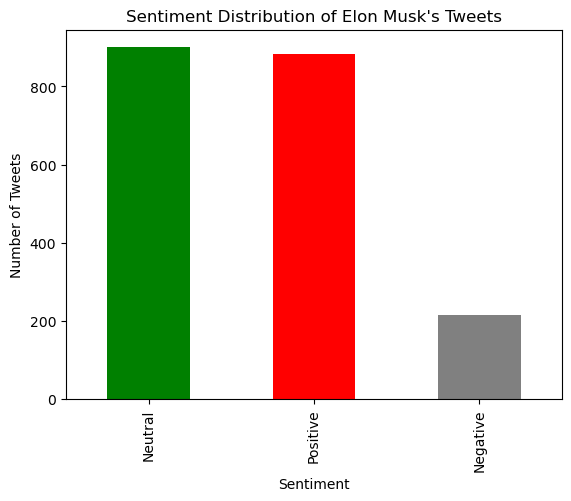

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [4]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud


elon_tweets_df = pd.read_csv('Elon_musk.csv', encoding='ISO-8859-1')


print(elon_tweets_df.head())

#sentiment analysis using TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Classify the polarity of the tweet
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Applying sentiment analysis to each tweet
elon_tweets_df['Sentiment'] = elon_tweets_df['Text'].apply(analyze_sentiment)

# Displaying the sentiment distribution
sentiment_distribution = elon_tweets_df['Sentiment'].value_counts()
print(sentiment_distribution)

# Visualizing the sentiment distribution
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Elon Musk\'s Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

# Generate a word cloud for positive and negative tweets
positive_tweets = elon_tweets_df[elon_tweets_df['Sentiment'] == 'Positive']['Text']
negative_tweets = elon_tweets_df[elon_tweets_df['Sentiment'] == 'Negative']['Text']

# Generate a WordCloud for positive tweets
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))
plt.figure



 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

# punkt tokenizer data
nltk.download('punkt')

#VADER lexicon
nltk.download('vader_lexicon')

#WordNet resource
nltk.download('wordnet')

#  OMW resource
nltk.download('omw-1.4')

# Loading reviews from files
def load_reviews(file_path, encoding='utf-8'):
    with open(file_path, 'r', encoding=encoding, errors='ignore') as file:
        reviews = file.readlines()
    return [review.strip() for review in reviews]

# Loading positive and negative words
positive_words = load_reviews('positive-words.txt', encoding='latin-1')
negative_words = load_reviews('negative-words.txt', encoding='latin-1')

# Loading stopwords
stop_words = load_reviews('stop.txt', encoding='latin-1')

# Function to preprocess text
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Function to analyze sentiment
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)['compound']
    
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Analyzing reviews from positive-words.txt
for review in positive_words:
    processed_review = preprocess_text(review)
    sentiment = analyze_sentiment(processed_review)
    emotion = perform_emotion_mining(processed_review)

    print(f"Review: {review}")
    print(f"Processed Text: {processed_review}")
    print(f"Sentiment: {sentiment}")
    print(f"Emotion: {emotion}")
    print("\n")

# Analyzing reviews from negative-words.txt
for review in negative_words:
    processed_review = preprocess_text(review)
    sentiment = analyze_sentiment(processed_review)
    emotion = perform_emotion_mining(processed_review)

    print(f"Review: {review}")
    print(f"Processed Text: {processed_review}")
    print(f"Sentiment: {sentiment}")
    print(f"Emotion: {emotion}")
    print("\n")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\npooj_lqfqpr2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\npooj_lqfqpr2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\npooj_lqfqpr2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\npooj_lqfqpr2\AppData\Roaming\nltk_data...


Review: ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: ;
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: ; Opinion Lexicon: Positive
Processed Text: opinion lexicon positive
Sentiment: Positive
Emotion: Joy


Review: ;
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: ; This file contains a list of POSITIVE opinion words (or sentiment words).
Processed Text: file list positive opinion word sentiment word
Sentiment: Positive
Emotion: Joy


Review: ;
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: ; This file and the papers can all be downloaded from
Processed Text: file paper downloaded
Sentiment: Neutral
Emotion: Neutral


Review: ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
Processed Text: http
Sentiment: Neutral
Emotion: Neutral


Review: ;
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: ; If you use this list, please c

Review: advantage
Processed Text: advantage
Sentiment: Positive
Emotion: Joy


Review: advantageous
Processed Text: advantageous
Sentiment: Positive
Emotion: Joy


Review: advantageously
Processed Text: advantageously
Sentiment: Positive
Emotion: Joy


Review: advantages
Processed Text: advantage
Sentiment: Positive
Emotion: Joy


Review: adventuresome
Processed Text: adventuresome
Sentiment: Positive
Emotion: Neutral


Review: adventurous
Processed Text: adventurous
Sentiment: Positive
Emotion: Neutral


Review: advocate
Processed Text: advocate
Sentiment: Neutral
Emotion: Joy


Review: advocated
Processed Text: advocated
Sentiment: Neutral
Emotion: Joy


Review: advocates
Processed Text: advocate
Sentiment: Neutral
Emotion: Joy


Review: affability
Processed Text: affability
Sentiment: Neutral
Emotion: Joy


Review: affable
Processed Text: affable
Sentiment: Neutral
Emotion: Joy


Review: affably
Processed Text: affably
Sentiment: Neutral
Emotion: Joy


Review: affectation
Processed 

Review: awarded
Processed Text: awarded
Sentiment: Positive
Emotion: Joy


Review: awards
Processed Text: award
Sentiment: Positive
Emotion: Joy


Review: awe
Processed Text: awe
Sentiment: Neutral
Emotion: Joy


Review: awed
Processed Text: awed
Sentiment: Neutral
Emotion: Joy


Review: awesome
Processed Text: awesome
Sentiment: Positive
Emotion: Joy


Review: awesomely
Processed Text: awesomely
Sentiment: Neutral
Emotion: Joy


Review: awesomeness
Processed Text: awesomeness
Sentiment: Neutral
Emotion: Joy


Review: awestruck
Processed Text: awestruck
Sentiment: Neutral
Emotion: Joy


Review: awsome
Processed Text: awsome
Sentiment: Neutral
Emotion: Joy


Review: backbone
Processed Text: backbone
Sentiment: Neutral
Emotion: Joy


Review: balanced
Processed Text: balanced
Sentiment: Neutral
Emotion: Joy


Review: bargain
Processed Text: bargain
Sentiment: Positive
Emotion: Joy


Review: beauteous
Processed Text: beauteous
Sentiment: Positive
Emotion: Joy


Review: beautiful
Processed 

Review: cheer
Processed Text: cheer
Sentiment: Positive
Emotion: Joy


Review: cheerful
Processed Text: cheerful
Sentiment: Positive
Emotion: Joy


Review: cheery
Processed Text: cheery
Sentiment: Positive
Emotion: Joy


Review: cherish
Processed Text: cherish
Sentiment: Positive
Emotion: Joy


Review: cherished
Processed Text: cherished
Sentiment: Positive
Emotion: Joy


Review: cherub
Processed Text: cherub
Sentiment: Neutral
Emotion: Joy


Review: chic
Processed Text: chic
Sentiment: Positive
Emotion: Joy


Review: chivalrous
Processed Text: chivalrous
Sentiment: Neutral
Emotion: Joy


Review: chivalry
Processed Text: chivalry
Sentiment: Neutral
Emotion: Joy


Review: civility
Processed Text: civility
Sentiment: Neutral
Emotion: Joy


Review: civilize
Processed Text: civilize
Sentiment: Neutral
Emotion: Joy


Review: clarity
Processed Text: clarity
Sentiment: Positive
Emotion: Joy


Review: classic
Processed Text: classic
Sentiment: Neutral
Emotion: Joy


Review: classy
Processed Te

Review: crisper
Processed Text: crisper
Sentiment: Neutral
Emotion: Joy


Review: cure
Processed Text: cure
Sentiment: Neutral
Emotion: Joy


Review: cure-all
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: cushy
Processed Text: cushy
Sentiment: Neutral
Emotion: Joy


Review: cute
Processed Text: cute
Sentiment: Positive
Emotion: Joy


Review: cuteness
Processed Text: cuteness
Sentiment: Positive
Emotion: Joy


Review: danke
Processed Text: danke
Sentiment: Neutral
Emotion: Joy


Review: danken
Processed Text: danken
Sentiment: Neutral
Emotion: Joy


Review: daring
Processed Text: daring
Sentiment: Positive
Emotion: Joy


Review: daringly
Processed Text: daringly
Sentiment: Positive
Emotion: Joy


Review: darling
Processed Text: darling
Sentiment: Positive
Emotion: Joy


Review: dashing
Processed Text: dashing
Sentiment: Neutral
Emotion: Joy


Review: dauntless
Processed Text: dauntless
Sentiment: Positive
Emotion: Neutral


Review: dawn
Processed Text: dawn
Sentiment: N

Review: effusively
Processed Text: effusively
Sentiment: Neutral
Emotion: Joy


Review: effusiveness
Processed Text: effusiveness
Sentiment: Neutral
Emotion: Joy


Review: elan
Processed Text: elan
Sentiment: Neutral
Emotion: Joy


Review: elate
Processed Text: elate
Sentiment: Neutral
Emotion: Joy


Review: elated
Processed Text: elated
Sentiment: Positive
Emotion: Joy


Review: elatedly
Processed Text: elatedly
Sentiment: Neutral
Emotion: Joy


Review: elation
Processed Text: elation
Sentiment: Positive
Emotion: Joy


Review: electrify
Processed Text: electrify
Sentiment: Neutral
Emotion: Joy


Review: elegance
Processed Text: elegance
Sentiment: Positive
Emotion: Joy


Review: elegant
Processed Text: elegant
Sentiment: Positive
Emotion: Joy


Review: elegantly
Processed Text: elegantly
Sentiment: Positive
Emotion: Joy


Review: elevate
Processed Text: elevate
Sentiment: Neutral
Emotion: Joy


Review: elite
Processed Text: elite
Sentiment: Neutral
Emotion: Joy


Review: eloquence
Pro

Review: exceeds
Processed Text: exceeds
Sentiment: Neutral
Emotion: Joy


Review: excel
Processed Text: excel
Sentiment: Positive
Emotion: Joy


Review: exceled
Processed Text: exceled
Sentiment: Neutral
Emotion: Joy


Review: excelent
Processed Text: excelent
Sentiment: Neutral
Emotion: Joy


Review: excellant
Processed Text: excellant
Sentiment: Neutral
Emotion: Joy


Review: excelled
Processed Text: excelled
Sentiment: Positive
Emotion: Joy


Review: excellence
Processed Text: excellence
Sentiment: Positive
Emotion: Joy


Review: excellency
Processed Text: excellency
Sentiment: Positive
Emotion: Joy


Review: excellent
Processed Text: excellent
Sentiment: Positive
Emotion: Joy


Review: excellently
Processed Text: excellently
Sentiment: Positive
Emotion: Joy


Review: excels
Processed Text: excels
Sentiment: Positive
Emotion: Joy


Review: exceptional
Processed Text: exceptional
Sentiment: Neutral
Emotion: Joy


Review: exceptionally
Processed Text: exceptionally
Sentiment: Neutral


Review: flourishing
Processed Text: flourishing
Sentiment: Neutral
Emotion: Joy


Review: fluent
Processed Text: fluent
Sentiment: Neutral
Emotion: Joy


Review: flutter
Processed Text: flutter
Sentiment: Neutral
Emotion: Joy


Review: fond
Processed Text: fond
Sentiment: Positive
Emotion: Joy


Review: fondly
Processed Text: fondly
Sentiment: Positive
Emotion: Joy


Review: fondness
Processed Text: fondness
Sentiment: Positive
Emotion: Joy


Review: foolproof
Processed Text: foolproof
Sentiment: Positive
Emotion: Neutral


Review: foremost
Processed Text: foremost
Sentiment: Neutral
Emotion: Joy


Review: foresight
Processed Text: foresight
Sentiment: Neutral
Emotion: Joy


Review: formidable
Processed Text: formidable
Sentiment: Neutral
Emotion: Joy


Review: fortitude
Processed Text: fortitude
Sentiment: Neutral
Emotion: Joy


Review: fortuitous
Processed Text: fortuitous
Sentiment: Neutral
Emotion: Joy


Review: fortuitously
Processed Text: fortuitously
Sentiment: Neutral
Emotion: 

Review: hale
Processed Text: hale
Sentiment: Neutral
Emotion: Joy


Review: hallmark
Processed Text: hallmark
Sentiment: Neutral
Emotion: Neutral


Review: hallmarks
Processed Text: hallmark
Sentiment: Neutral
Emotion: Neutral


Review: hallowed
Processed Text: hallowed
Sentiment: Neutral
Emotion: Joy


Review: handier
Processed Text: handier
Sentiment: Neutral
Emotion: Neutral


Review: handily
Processed Text: handily
Sentiment: Neutral
Emotion: Joy


Review: hands-down
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: handsome
Processed Text: handsome
Sentiment: Positive
Emotion: Joy


Review: handsomely
Processed Text: handsomely
Sentiment: Positive
Emotion: Joy


Review: handy
Processed Text: handy
Sentiment: Neutral
Emotion: Joy


Review: happier
Processed Text: happier
Sentiment: Positive
Emotion: Joy


Review: happily
Processed Text: happily
Sentiment: Positive
Emotion: Joy


Review: happiness
Processed Text: happiness
Sentiment: Positive
Emotion: Joy


Review: happ

Review: infallibly
Processed Text: infallibly
Sentiment: Neutral
Emotion: Neutral


Review: influential
Processed Text: influential
Sentiment: Positive
Emotion: Joy


Review: ingenious
Processed Text: ingenious
Sentiment: Neutral
Emotion: Joy


Review: ingeniously
Processed Text: ingeniously
Sentiment: Neutral
Emotion: Joy


Review: ingenuity
Processed Text: ingenuity
Sentiment: Neutral
Emotion: Joy


Review: ingenuous
Processed Text: ingenuous
Sentiment: Neutral
Emotion: Joy


Review: ingenuously
Processed Text: ingenuously
Sentiment: Neutral
Emotion: Joy


Review: innocuous
Processed Text: innocuous
Sentiment: Neutral
Emotion: Joy


Review: innovation
Processed Text: innovation
Sentiment: Positive
Emotion: Joy


Review: innovative
Processed Text: innovative
Sentiment: Positive
Emotion: Joy


Review: inpressed
Processed Text: inpressed
Sentiment: Neutral
Emotion: Joy


Review: insightful
Processed Text: insightful
Sentiment: Neutral
Emotion: Joy


Review: insightfully
Processed Text: 

Review: loved
Processed Text: loved
Sentiment: Positive
Emotion: Joy


Review: loveliness
Processed Text: loveliness
Sentiment: Neutral
Emotion: Joy


Review: lovely
Processed Text: lovely
Sentiment: Positive
Emotion: Joy


Review: lover
Processed Text: lover
Sentiment: Positive
Emotion: Joy


Review: loves
Processed Text: love
Sentiment: Positive
Emotion: Joy


Review: loving
Processed Text: loving
Sentiment: Positive
Emotion: Joy


Review: low-cost
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: low-price
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: low-priced
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: low-risk
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: lower-priced
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: loyal
Processed Text: loyal
Sentiment: Positive
Emotion: Joy


Review: loyalty
Processed Text: loyalty
Sentiment: Positive
Emotion: Joy


Review: lucid
Processed Text: lucid
Sentiment: Ne

Review: non-violence
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: non-violent
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: notably
Processed Text: notably
Sentiment: Neutral
Emotion: Joy


Review: noteworthy
Processed Text: noteworthy
Sentiment: Neutral
Emotion: Joy


Review: nourish
Processed Text: nourish
Sentiment: Neutral
Emotion: Joy


Review: nourishing
Processed Text: nourishing
Sentiment: Neutral
Emotion: Joy


Review: nourishment
Processed Text: nourishment
Sentiment: Neutral
Emotion: Joy


Review: novelty
Processed Text: novelty
Sentiment: Neutral
Emotion: Joy


Review: nurturing
Processed Text: nurturing
Sentiment: Positive
Emotion: Joy


Review: oasis
Processed Text: oasis
Sentiment: Neutral
Emotion: Joy


Review: obsession
Processed Text: obsession
Sentiment: Negative
Emotion: Sadness


Review: obsessions
Processed Text: obsession
Sentiment: Negative
Emotion: Sadness


Review: obtainable
Processed Text: obtainable
Sentiment: Neutral
Emot

Review: polished
Processed Text: polished
Sentiment: Neutral
Emotion: Joy


Review: polite
Processed Text: polite
Sentiment: Neutral
Emotion: Joy


Review: politeness
Processed Text: politeness
Sentiment: Neutral
Emotion: Joy


Review: popular
Processed Text: popular
Sentiment: Positive
Emotion: Joy


Review: portable
Processed Text: portable
Sentiment: Neutral
Emotion: Joy


Review: posh
Processed Text: posh
Sentiment: Neutral
Emotion: Joy


Review: positive
Processed Text: positive
Sentiment: Positive
Emotion: Joy


Review: positively
Processed Text: positively
Sentiment: Positive
Emotion: Joy


Review: positives
Processed Text: positive
Sentiment: Positive
Emotion: Joy


Review: powerful
Processed Text: powerful
Sentiment: Positive
Emotion: Joy


Review: powerfully
Processed Text: powerfully
Sentiment: Neutral
Emotion: Joy


Review: praise
Processed Text: praise
Sentiment: Positive
Emotion: Joy


Review: praiseworthy
Processed Text: praiseworthy
Sentiment: Positive
Emotion: Joy


Re

Review: refined
Processed Text: refined
Sentiment: Neutral
Emotion: Joy


Review: refinement
Processed Text: refinement
Sentiment: Neutral
Emotion: Joy


Review: reform
Processed Text: reform
Sentiment: Neutral
Emotion: Joy


Review: reformed
Processed Text: reformed
Sentiment: Neutral
Emotion: Joy


Review: reforming
Processed Text: reforming
Sentiment: Neutral
Emotion: Joy


Review: reforms
Processed Text: reform
Sentiment: Neutral
Emotion: Joy


Review: refresh
Processed Text: refresh
Sentiment: Neutral
Emotion: Joy


Review: refreshed
Processed Text: refreshed
Sentiment: Neutral
Emotion: Joy


Review: refreshing
Processed Text: refreshing
Sentiment: Neutral
Emotion: Joy


Review: refund
Processed Text: refund
Sentiment: Neutral
Emotion: Joy


Review: refunded
Processed Text: refunded
Sentiment: Neutral
Emotion: Joy


Review: regal
Processed Text: regal
Sentiment: Neutral
Emotion: Joy


Review: regally
Processed Text: regally
Sentiment: Neutral
Emotion: Joy


Review: regard
Processe

Review: savior
Processed Text: savior
Sentiment: Neutral
Emotion: Joy


Review: savvy
Processed Text: savvy
Sentiment: Neutral
Emotion: Joy


Review: scenic
Processed Text: scenic
Sentiment: Neutral
Emotion: Joy


Review: seamless
Processed Text: seamless
Sentiment: Neutral
Emotion: Joy


Review: seasoned
Processed Text: seasoned
Sentiment: Neutral
Emotion: Joy


Review: secure
Processed Text: secure
Sentiment: Positive
Emotion: Joy


Review: securely
Processed Text: securely
Sentiment: Positive
Emotion: Joy


Review: selective
Processed Text: selective
Sentiment: Neutral
Emotion: Joy


Review: self-determination
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: self-respect
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: self-satisfaction
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: self-sufficiency
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: self-sufficient
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: 

Review: stunningly
Processed Text: stunningly
Sentiment: Neutral
Emotion: Joy


Review: stupendous
Processed Text: stupendous
Sentiment: Neutral
Emotion: Joy


Review: stupendously
Processed Text: stupendously
Sentiment: Neutral
Emotion: Joy


Review: sturdier
Processed Text: sturdier
Sentiment: Neutral
Emotion: Neutral


Review: sturdy
Processed Text: sturdy
Sentiment: Neutral
Emotion: Joy


Review: stylish
Processed Text: stylish
Sentiment: Neutral
Emotion: Neutral


Review: stylishly
Processed Text: stylishly
Sentiment: Neutral
Emotion: Joy


Review: stylized
Processed Text: stylized
Sentiment: Neutral
Emotion: Neutral


Review: suave
Processed Text: suave
Sentiment: Positive
Emotion: Joy


Review: suavely
Processed Text: suavely
Sentiment: Neutral
Emotion: Joy


Review: sublime
Processed Text: sublime
Sentiment: Neutral
Emotion: Joy


Review: subsidize
Processed Text: subsidize
Sentiment: Neutral
Emotion: Neutral


Review: subsidized
Processed Text: subsidized
Sentiment: Neutral
Em

Review: titillate
Processed Text: titillate
Sentiment: Neutral
Emotion: Joy


Review: titillating
Processed Text: titillating
Sentiment: Neutral
Emotion: Joy


Review: titillatingly
Processed Text: titillatingly
Sentiment: Neutral
Emotion: Joy


Review: togetherness
Processed Text: togetherness
Sentiment: Neutral
Emotion: Joy


Review: tolerable
Processed Text: tolerable
Sentiment: Neutral
Emotion: Joy


Review: toll-free
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: top
Processed Text: top
Sentiment: Positive
Emotion: Joy


Review: top-notch
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: top-quality
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: topnotch
Processed Text: topnotch
Sentiment: Neutral
Emotion: Joy


Review: tops
Processed Text: top
Sentiment: Positive
Emotion: Joy


Review: tough
Processed Text: tough
Sentiment: Negative
Emotion: Neutral


Review: tougher
Processed Text: tougher
Sentiment: Positive
Emotion: Joy


Review: to

Review: well
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-backlit
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-balanced
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-behaved
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-being
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-bred
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-connected
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-educated
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-established
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-informed
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-intentioned
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-known
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-made
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: well-mana

Review: abominably
Processed Text: abominably
Sentiment: Neutral
Emotion: Sadness


Review: abominate
Processed Text: abominate
Sentiment: Neutral
Emotion: Sadness


Review: abomination
Processed Text: abomination
Sentiment: Neutral
Emotion: Sadness


Review: abort
Processed Text: abort
Sentiment: Neutral
Emotion: Sadness


Review: aborted
Processed Text: aborted
Sentiment: Neutral
Emotion: Sadness


Review: aborts
Processed Text: abort
Sentiment: Neutral
Emotion: Sadness


Review: abrade
Processed Text: abrade
Sentiment: Neutral
Emotion: Sadness


Review: abrasive
Processed Text: abrasive
Sentiment: Neutral
Emotion: Sadness


Review: abrupt
Processed Text: abrupt
Sentiment: Neutral
Emotion: Sadness


Review: abruptly
Processed Text: abruptly
Sentiment: Neutral
Emotion: Sadness


Review: abscond
Processed Text: abscond
Sentiment: Neutral
Emotion: Sadness


Review: absence
Processed Text: absence
Sentiment: Neutral
Emotion: Sadness


Review: absent-minded
Processed Text: 
Sentiment: Neu

Review: ambiguous
Processed Text: ambiguous
Sentiment: Neutral
Emotion: Sadness


Review: ambivalence
Processed Text: ambivalence
Sentiment: Neutral
Emotion: Sadness


Review: ambivalent
Processed Text: ambivalent
Sentiment: Positive
Emotion: Sadness


Review: ambush
Processed Text: ambush
Sentiment: Neutral
Emotion: Sadness


Review: amiss
Processed Text: amiss
Sentiment: Neutral
Emotion: Sadness


Review: amputate
Processed Text: amputate
Sentiment: Neutral
Emotion: Sadness


Review: anarchism
Processed Text: anarchism
Sentiment: Neutral
Emotion: Sadness


Review: anarchist
Processed Text: anarchist
Sentiment: Neutral
Emotion: Sadness


Review: anarchistic
Processed Text: anarchistic
Sentiment: Neutral
Emotion: Sadness


Review: anarchy
Processed Text: anarchy
Sentiment: Neutral
Emotion: Sadness


Review: anemic
Processed Text: anemic
Sentiment: Neutral
Emotion: Sadness


Review: anger
Processed Text: anger
Sentiment: Negative
Emotion: Sadness


Review: angrily
Processed Text: angril

Review: avariciously
Processed Text: avariciously
Sentiment: Neutral
Emotion: Sadness


Review: avenge
Processed Text: avenge
Sentiment: Neutral
Emotion: Sadness


Review: averse
Processed Text: averse
Sentiment: Neutral
Emotion: Neutral


Review: aversion
Processed Text: aversion
Sentiment: Negative
Emotion: Neutral


Review: aweful
Processed Text: aweful
Sentiment: Neutral
Emotion: Neutral


Review: awful
Processed Text: awful
Sentiment: Negative
Emotion: Sadness


Review: awfully
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: awfulness
Processed Text: awfulness
Sentiment: Neutral
Emotion: Sadness


Review: awkward
Processed Text: awkward
Sentiment: Negative
Emotion: Sadness


Review: awkwardness
Processed Text: awkwardness
Sentiment: Negative
Emotion: Sadness


Review: ax
Processed Text: ax
Sentiment: Neutral
Emotion: Sadness


Review: babble
Processed Text: babble
Sentiment: Neutral
Emotion: Sadness


Review: back-logged
Processed Text: 
Sentiment: Neutral
Emotion: 

Review: blab
Processed Text: blab
Sentiment: Neutral
Emotion: Sadness


Review: blabber
Processed Text: blabber
Sentiment: Neutral
Emotion: Sadness


Review: blackmail
Processed Text: blackmail
Sentiment: Neutral
Emotion: Sadness


Review: blah
Processed Text: blah
Sentiment: Negative
Emotion: Sadness


Review: blame
Processed Text: blame
Sentiment: Negative
Emotion: Sadness


Review: blameworthy
Processed Text: blameworthy
Sentiment: Negative
Emotion: Sadness


Review: bland
Processed Text: bland
Sentiment: Neutral
Emotion: Sadness


Review: blandish
Processed Text: blandish
Sentiment: Neutral
Emotion: Sadness


Review: blaspheme
Processed Text: blaspheme
Sentiment: Neutral
Emotion: Sadness


Review: blasphemous
Processed Text: blasphemous
Sentiment: Neutral
Emotion: Sadness


Review: blasphemy
Processed Text: blasphemy
Sentiment: Neutral
Emotion: Sadness


Review: blasted
Processed Text: blasted
Sentiment: Neutral
Emotion: Sadness


Review: blatant
Processed Text: blatant
Sentiment: 

Review: bugs
Processed Text: bug
Sentiment: Neutral
Emotion: Sadness


Review: bulkier
Processed Text: bulkier
Sentiment: Neutral
Emotion: Sadness


Review: bulkiness
Processed Text: bulkiness
Sentiment: Neutral
Emotion: Sadness


Review: bulky
Processed Text: bulky
Sentiment: Neutral
Emotion: Sadness


Review: bulkyness
Processed Text: bulkyness
Sentiment: Neutral
Emotion: Sadness


Review: bull****
Processed Text: bull
Sentiment: Neutral
Emotion: Neutral


Review: bull----
Processed Text: bull
Sentiment: Neutral
Emotion: Neutral


Review: bullies
Processed Text: bully
Sentiment: Negative
Emotion: Sadness


Review: bullshit
Processed Text: bullshit
Sentiment: Negative
Emotion: Sadness


Review: bullshyt
Processed Text: bullshyt
Sentiment: Neutral
Emotion: Sadness


Review: bully
Processed Text: bully
Sentiment: Negative
Emotion: Sadness


Review: bullying
Processed Text: bullying
Sentiment: Negative
Emotion: Sadness


Review: bullyingly
Processed Text: bullyingly
Sentiment: Neutral
Em

Review: choppy
Processed Text: choppy
Sentiment: Neutral
Emotion: Sadness


Review: chore
Processed Text: chore
Sentiment: Neutral
Emotion: Sadness


Review: chronic
Processed Text: chronic
Sentiment: Neutral
Emotion: Sadness


Review: chunky
Processed Text: chunky
Sentiment: Neutral
Emotion: Sadness


Review: clamor
Processed Text: clamor
Sentiment: Neutral
Emotion: Sadness


Review: clamorous
Processed Text: clamorous
Sentiment: Neutral
Emotion: Sadness


Review: clash
Processed Text: clash
Sentiment: Neutral
Emotion: Sadness


Review: cliche
Processed Text: cliche
Sentiment: Neutral
Emotion: Sadness


Review: cliched
Processed Text: cliched
Sentiment: Neutral
Emotion: Sadness


Review: clique
Processed Text: clique
Sentiment: Neutral
Emotion: Sadness


Review: clog
Processed Text: clog
Sentiment: Neutral
Emotion: Sadness


Review: clogged
Processed Text: clogged
Sentiment: Neutral
Emotion: Sadness


Review: clogs
Processed Text: clog
Sentiment: Neutral
Emotion: Sadness


Review: clo

Review: contaminate
Processed Text: contaminate
Sentiment: Neutral
Emotion: Sadness


Review: contaminated
Processed Text: contaminated
Sentiment: Neutral
Emotion: Sadness


Review: contaminates
Processed Text: contaminates
Sentiment: Neutral
Emotion: Sadness


Review: contaminating
Processed Text: contaminating
Sentiment: Neutral
Emotion: Sadness


Review: contamination
Processed Text: contamination
Sentiment: Neutral
Emotion: Sadness


Review: contempt
Processed Text: contempt
Sentiment: Negative
Emotion: Neutral


Review: contemptible
Processed Text: contemptible
Sentiment: Negative
Emotion: Sadness


Review: contemptuous
Processed Text: contemptuous
Sentiment: Negative
Emotion: Sadness


Review: contemptuously
Processed Text: contemptuously
Sentiment: Negative
Emotion: Sadness


Review: contend
Processed Text: contend
Sentiment: Positive
Emotion: Sadness


Review: contention
Processed Text: contention
Sentiment: Neutral
Emotion: Sadness


Review: contentious
Processed Text: content

Review: crush
Processed Text: crush
Sentiment: Negative
Emotion: Sadness


Review: crushed
Processed Text: crushed
Sentiment: Negative
Emotion: Sadness


Review: crushing
Processed Text: crushing
Sentiment: Negative
Emotion: Sadness


Review: cry
Processed Text: cry
Sentiment: Negative
Emotion: Sadness


Review: culpable
Processed Text: culpable
Sentiment: Neutral
Emotion: Sadness


Review: culprit
Processed Text: culprit
Sentiment: Neutral
Emotion: Sadness


Review: cumbersome
Processed Text: cumbersome
Sentiment: Neutral
Emotion: Sadness


Review: cunt
Processed Text: cunt
Sentiment: Negative
Emotion: Sadness


Review: cunts
Processed Text: cunt
Sentiment: Negative
Emotion: Sadness


Review: cuplrit
Processed Text: cuplrit
Sentiment: Neutral
Emotion: Sadness


Review: curse
Processed Text: curse
Sentiment: Negative
Emotion: Sadness


Review: cursed
Processed Text: cursed
Sentiment: Neutral
Emotion: Sadness


Review: curses
Processed Text: curse
Sentiment: Negative
Emotion: Sadness




Review: deign
Processed Text: deign
Sentiment: Neutral
Emotion: Sadness


Review: deject
Processed Text: deject
Sentiment: Negative
Emotion: Sadness


Review: dejected
Processed Text: dejected
Sentiment: Negative
Emotion: Sadness


Review: dejectedly
Processed Text: dejectedly
Sentiment: Neutral
Emotion: Sadness


Review: dejection
Processed Text: dejection
Sentiment: Neutral
Emotion: Sadness


Review: delay
Processed Text: delay
Sentiment: Negative
Emotion: Sadness


Review: delayed
Processed Text: delayed
Sentiment: Negative
Emotion: Sadness


Review: delaying
Processed Text: delaying
Sentiment: Neutral
Emotion: Sadness


Review: delays
Processed Text: delay
Sentiment: Negative
Emotion: Sadness


Review: delinquency
Processed Text: delinquency
Sentiment: Neutral
Emotion: Sadness


Review: delinquent
Processed Text: delinquent
Sentiment: Neutral
Emotion: Sadness


Review: delirious
Processed Text: delirious
Sentiment: Neutral
Emotion: Sadness


Review: delirium
Processed Text: deliriu

Review: detracting
Processed Text: detracting
Sentiment: Neutral
Emotion: Sadness


Review: detraction
Processed Text: detraction
Sentiment: Neutral
Emotion: Sadness


Review: detracts
Processed Text: detracts
Sentiment: Neutral
Emotion: Sadness


Review: detriment
Processed Text: detriment
Sentiment: Neutral
Emotion: Sadness


Review: detrimental
Processed Text: detrimental
Sentiment: Neutral
Emotion: Sadness


Review: devastate
Processed Text: devastate
Sentiment: Negative
Emotion: Sadness


Review: devastated
Processed Text: devastated
Sentiment: Negative
Emotion: Sadness


Review: devastates
Processed Text: devastates
Sentiment: Negative
Emotion: Sadness


Review: devastating
Processed Text: devastating
Sentiment: Negative
Emotion: Sadness


Review: devastatingly
Processed Text: devastatingly
Sentiment: Negative
Emotion: Sadness


Review: devastation
Processed Text: devastation
Sentiment: Negative
Emotion: Sadness


Review: deviate
Processed Text: deviate
Sentiment: Neutral
Emotion

Review: discontinued
Processed Text: discontinued
Sentiment: Neutral
Emotion: Sadness


Review: discontinuity
Processed Text: discontinuity
Sentiment: Neutral
Emotion: Neutral


Review: discontinuous
Processed Text: discontinuous
Sentiment: Neutral
Emotion: Sadness


Review: discord
Processed Text: discord
Sentiment: Negative
Emotion: Sadness


Review: discordance
Processed Text: discordance
Sentiment: Neutral
Emotion: Sadness


Review: discordant
Processed Text: discordant
Sentiment: Neutral
Emotion: Sadness


Review: discountenance
Processed Text: discountenance
Sentiment: Neutral
Emotion: Sadness


Review: discourage
Processed Text: discourage
Sentiment: Negative
Emotion: Sadness


Review: discouragement
Processed Text: discouragement
Sentiment: Negative
Emotion: Sadness


Review: discouraging
Processed Text: discouraging
Sentiment: Negative
Emotion: Sadness


Review: discouragingly
Processed Text: discouragingly
Sentiment: Negative
Emotion: Sadness


Review: discourteous
Processed 

Review: disprove
Processed Text: disprove
Sentiment: Neutral
Emotion: Sadness


Review: disputable
Processed Text: disputable
Sentiment: Neutral
Emotion: Sadness


Review: dispute
Processed Text: dispute
Sentiment: Negative
Emotion: Sadness


Review: disputed
Processed Text: disputed
Sentiment: Negative
Emotion: Sadness


Review: disquiet
Processed Text: disquiet
Sentiment: Negative
Emotion: Neutral


Review: disquieting
Processed Text: disquieting
Sentiment: Neutral
Emotion: Sadness


Review: disquietingly
Processed Text: disquietingly
Sentiment: Neutral
Emotion: Sadness


Review: disquietude
Processed Text: disquietude
Sentiment: Neutral
Emotion: Sadness


Review: disregard
Processed Text: disregard
Sentiment: Negative
Emotion: Neutral


Review: disregardful
Processed Text: disregardful
Sentiment: Neutral
Emotion: Sadness


Review: disreputable
Processed Text: disreputable
Sentiment: Neutral
Emotion: Neutral


Review: disrepute
Processed Text: disrepute
Sentiment: Neutral
Emotion: Sa

Review: downhill
Processed Text: downhill
Sentiment: Neutral
Emotion: Sadness


Review: downside
Processed Text: downside
Sentiment: Negative
Emotion: Sadness


Review: downsides
Processed Text: downside
Sentiment: Negative
Emotion: Sadness


Review: downturn
Processed Text: downturn
Sentiment: Neutral
Emotion: Sadness


Review: downturns
Processed Text: downturn
Sentiment: Neutral
Emotion: Sadness


Review: drab
Processed Text: drab
Sentiment: Neutral
Emotion: Sadness


Review: draconian
Processed Text: draconian
Sentiment: Neutral
Emotion: Sadness


Review: draconic
Processed Text: draconic
Sentiment: Neutral
Emotion: Sadness


Review: drag
Processed Text: drag
Sentiment: Negative
Emotion: Sadness


Review: dragged
Processed Text: dragged
Sentiment: Negative
Emotion: Sadness


Review: dragging
Processed Text: dragging
Sentiment: Neutral
Emotion: Sadness


Review: dragoon
Processed Text: dragoon
Sentiment: Neutral
Emotion: Sadness


Review: drags
Processed Text: drag
Sentiment: Negati

Review: erosion
Processed Text: erosion
Sentiment: Neutral
Emotion: Sadness


Review: err
Processed Text: err
Sentiment: Neutral
Emotion: Sadness


Review: errant
Processed Text: errant
Sentiment: Neutral
Emotion: Sadness


Review: erratic
Processed Text: erratic
Sentiment: Neutral
Emotion: Sadness


Review: erratically
Processed Text: erratically
Sentiment: Neutral
Emotion: Sadness


Review: erroneous
Processed Text: erroneous
Sentiment: Negative
Emotion: Sadness


Review: erroneously
Processed Text: erroneously
Sentiment: Neutral
Emotion: Sadness


Review: error
Processed Text: error
Sentiment: Negative
Emotion: Sadness


Review: errors
Processed Text: error
Sentiment: Negative
Emotion: Sadness


Review: eruptions
Processed Text: eruption
Sentiment: Neutral
Emotion: Neutral


Review: escapade
Processed Text: escapade
Sentiment: Neutral
Emotion: Sadness


Review: eschew
Processed Text: eschew
Sentiment: Neutral
Emotion: Sadness


Review: estranged
Processed Text: estranged
Sentiment: 

Review: fascist
Processed Text: fascist
Sentiment: Negative
Emotion: Sadness


Review: fastidious
Processed Text: fastidious
Sentiment: Neutral
Emotion: Neutral


Review: fastidiously
Processed Text: fastidiously
Sentiment: Neutral
Emotion: Sadness


Review: fastuous
Processed Text: fastuous
Sentiment: Neutral
Emotion: Neutral


Review: fat
Processed Text: fat
Sentiment: Neutral
Emotion: Sadness


Review: fat-cat
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: fat-cats
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: fatal
Processed Text: fatal
Sentiment: Negative
Emotion: Sadness


Review: fatalistic
Processed Text: fatalistic
Sentiment: Negative
Emotion: Sadness


Review: fatalistically
Processed Text: fatalistically
Sentiment: Neutral
Emotion: Sadness


Review: fatally
Processed Text: fatally
Sentiment: Negative
Emotion: Sadness


Review: fatcat
Processed Text: fatcat
Sentiment: Neutral
Emotion: Sadness


Review: fatcats
Processed Text: fatcats
Sentiment

Review: forbid
Processed Text: forbid
Sentiment: Negative
Emotion: Sadness


Review: forbidden
Processed Text: forbidden
Sentiment: Negative
Emotion: Sadness


Review: forbidding
Processed Text: forbidding
Sentiment: Negative
Emotion: Sadness


Review: forceful
Processed Text: forceful
Sentiment: Neutral
Emotion: Sadness


Review: foreboding
Processed Text: foreboding
Sentiment: Neutral
Emotion: Sadness


Review: forebodingly
Processed Text: forebodingly
Sentiment: Neutral
Emotion: Sadness


Review: forfeit
Processed Text: forfeit
Sentiment: Neutral
Emotion: Sadness


Review: forged
Processed Text: forged
Sentiment: Neutral
Emotion: Sadness


Review: forgetful
Processed Text: forgetful
Sentiment: Negative
Emotion: Sadness


Review: forgetfully
Processed Text: forgetfully
Sentiment: Neutral
Emotion: Sadness


Review: forgetfulness
Processed Text: forgetfulness
Sentiment: Neutral
Emotion: Sadness


Review: forlorn
Processed Text: forlorn
Sentiment: Neutral
Emotion: Sadness


Review: forl

Review: gibe
Processed Text: gibe
Sentiment: Neutral
Emotion: Sadness


Review: giddy
Processed Text: giddy
Sentiment: Negative
Emotion: Sadness


Review: gimmick
Processed Text: gimmick
Sentiment: Neutral
Emotion: Sadness


Review: gimmicked
Processed Text: gimmicked
Sentiment: Neutral
Emotion: Sadness


Review: gimmicking
Processed Text: gimmicking
Sentiment: Neutral
Emotion: Sadness


Review: gimmicks
Processed Text: gimmick
Sentiment: Neutral
Emotion: Sadness


Review: gimmicky
Processed Text: gimmicky
Sentiment: Neutral
Emotion: Sadness


Review: glare
Processed Text: glare
Sentiment: Neutral
Emotion: Sadness


Review: glaringly
Processed Text: glaringly
Sentiment: Neutral
Emotion: Sadness


Review: glib
Processed Text: glib
Sentiment: Neutral
Emotion: Sadness


Review: glibly
Processed Text: glibly
Sentiment: Neutral
Emotion: Sadness


Review: glitch
Processed Text: glitch
Sentiment: Neutral
Emotion: Sadness


Review: glitches
Processed Text: glitch
Sentiment: Neutral
Emotion: Sa

Review: harden
Processed Text: harden
Sentiment: Neutral
Emotion: Sadness


Review: hardened
Processed Text: hardened
Sentiment: Neutral
Emotion: Sadness


Review: hardheaded
Processed Text: hardheaded
Sentiment: Neutral
Emotion: Sadness


Review: hardhearted
Processed Text: hardhearted
Sentiment: Neutral
Emotion: Sadness


Review: hardliner
Processed Text: hardliner
Sentiment: Neutral
Emotion: Sadness


Review: hardliners
Processed Text: hardliner
Sentiment: Neutral
Emotion: Sadness


Review: hardship
Processed Text: hardship
Sentiment: Negative
Emotion: Sadness


Review: hardships
Processed Text: hardship
Sentiment: Negative
Emotion: Sadness


Review: harm
Processed Text: harm
Sentiment: Negative
Emotion: Sadness


Review: harmed
Processed Text: harmed
Sentiment: Negative
Emotion: Sadness


Review: harmful
Processed Text: harmful
Sentiment: Neutral
Emotion: Sadness


Review: harms
Processed Text: harm
Sentiment: Negative
Emotion: Sadness


Review: harpy
Processed Text: harpy
Sentimen

Review: horrid
Processed Text: horrid
Sentiment: Negative
Emotion: Sadness


Review: horrific
Processed Text: horrific
Sentiment: Negative
Emotion: Sadness


Review: horrified
Processed Text: horrified
Sentiment: Negative
Emotion: Sadness


Review: horrifies
Processed Text: horrifies
Sentiment: Negative
Emotion: Sadness


Review: horrify
Processed Text: horrify
Sentiment: Negative
Emotion: Sadness


Review: horrifying
Processed Text: horrifying
Sentiment: Negative
Emotion: Sadness


Review: horrifys
Processed Text: horrifys
Sentiment: Neutral
Emotion: Sadness


Review: hostage
Processed Text: hostage
Sentiment: Neutral
Emotion: Sadness


Review: hostile
Processed Text: hostile
Sentiment: Negative
Emotion: Sadness


Review: hostilities
Processed Text: hostility
Sentiment: Negative
Emotion: Sadness


Review: hostility
Processed Text: hostility
Sentiment: Negative
Emotion: Sadness


Review: hotbeds
Processed Text: hotbed
Sentiment: Neutral
Emotion: Joy


Review: hothead
Processed Text: ho

Review: impeach
Processed Text: impeach
Sentiment: Neutral
Emotion: Neutral


Review: impedance
Processed Text: impedance
Sentiment: Neutral
Emotion: Sadness


Review: impede
Processed Text: impede
Sentiment: Neutral
Emotion: Sadness


Review: impediment
Processed Text: impediment
Sentiment: Neutral
Emotion: Sadness


Review: impending
Processed Text: impending
Sentiment: Neutral
Emotion: Sadness


Review: impenitent
Processed Text: impenitent
Sentiment: Neutral
Emotion: Sadness


Review: imperfect
Processed Text: imperfect
Sentiment: Negative
Emotion: Neutral


Review: imperfection
Processed Text: imperfection
Sentiment: Neutral
Emotion: Neutral


Review: imperfections
Processed Text: imperfection
Sentiment: Neutral
Emotion: Neutral


Review: imperfectly
Processed Text: imperfectly
Sentiment: Neutral
Emotion: Neutral


Review: imperialist
Processed Text: imperialist
Sentiment: Neutral
Emotion: Sadness


Review: imperil
Processed Text: imperil
Sentiment: Neutral
Emotion: Sadness


Revi

Review: incompetence
Processed Text: incompetence
Sentiment: Negative
Emotion: Sadness


Review: incompetent
Processed Text: incompetent
Sentiment: Negative
Emotion: Sadness


Review: incompetently
Processed Text: incompetently
Sentiment: Neutral
Emotion: Sadness


Review: incomplete
Processed Text: incomplete
Sentiment: Neutral
Emotion: Sadness


Review: incompliant
Processed Text: incompliant
Sentiment: Neutral
Emotion: Neutral


Review: incomprehensible
Processed Text: incomprehensible
Sentiment: Neutral
Emotion: Sadness


Review: incomprehension
Processed Text: incomprehension
Sentiment: Neutral
Emotion: Sadness


Review: inconceivable
Processed Text: inconceivable
Sentiment: Neutral
Emotion: Sadness


Review: inconceivably
Processed Text: inconceivably
Sentiment: Neutral
Emotion: Sadness


Review: incongruous
Processed Text: incongruous
Sentiment: Neutral
Emotion: Sadness


Review: incongruously
Processed Text: incongruously
Sentiment: Neutral
Emotion: Sadness


Review: inconseque

Review: inexperienced
Processed Text: inexperienced
Sentiment: Neutral
Emotion: Sadness


Review: inexpert
Processed Text: inexpert
Sentiment: Neutral
Emotion: Sadness


Review: inexpertly
Processed Text: inexpertly
Sentiment: Neutral
Emotion: Sadness


Review: inexpiable
Processed Text: inexpiable
Sentiment: Neutral
Emotion: Sadness


Review: inexplainable
Processed Text: inexplainable
Sentiment: Neutral
Emotion: Sadness


Review: inextricable
Processed Text: inextricable
Sentiment: Neutral
Emotion: Sadness


Review: inextricably
Processed Text: inextricably
Sentiment: Neutral
Emotion: Sadness


Review: infamous
Processed Text: infamous
Sentiment: Neutral
Emotion: Neutral


Review: infamously
Processed Text: infamously
Sentiment: Neutral
Emotion: Sadness


Review: infamy
Processed Text: infamy
Sentiment: Neutral
Emotion: Sadness


Review: infected
Processed Text: infected
Sentiment: Negative
Emotion: Sadness


Review: infection
Processed Text: infection
Sentiment: Neutral
Emotion: Sad

Review: insultingly
Processed Text: insultingly
Sentiment: Negative
Emotion: Sadness


Review: insults
Processed Text: insult
Sentiment: Negative
Emotion: Sadness


Review: insupportable
Processed Text: insupportable
Sentiment: Neutral
Emotion: Joy


Review: insupportably
Processed Text: insupportably
Sentiment: Neutral
Emotion: Neutral


Review: insurmountable
Processed Text: insurmountable
Sentiment: Neutral
Emotion: Neutral


Review: insurmountably
Processed Text: insurmountably
Sentiment: Neutral
Emotion: Neutral


Review: insurrection
Processed Text: insurrection
Sentiment: Neutral
Emotion: Sadness


Review: intefere
Processed Text: intefere
Sentiment: Neutral
Emotion: Sadness


Review: inteferes
Processed Text: inteferes
Sentiment: Neutral
Emotion: Sadness


Review: intense
Processed Text: intense
Sentiment: Positive
Emotion: Sadness


Review: interfere
Processed Text: interfere
Sentiment: Neutral
Emotion: Sadness


Review: interference
Processed Text: interference
Sentiment: Neu

Review: jagged
Processed Text: jagged
Sentiment: Neutral
Emotion: Sadness


Review: jam
Processed Text: jam
Sentiment: Neutral
Emotion: Sadness


Review: jarring
Processed Text: jarring
Sentiment: Neutral
Emotion: Sadness


Review: jaundiced
Processed Text: jaundiced
Sentiment: Neutral
Emotion: Sadness


Review: jealous
Processed Text: jealous
Sentiment: Negative
Emotion: Sadness


Review: jealously
Processed Text: jealously
Sentiment: Negative
Emotion: Sadness


Review: jealousness
Processed Text: jealousness
Sentiment: Negative
Emotion: Sadness


Review: jealousy
Processed Text: jealousy
Sentiment: Negative
Emotion: Sadness


Review: jeer
Processed Text: jeer
Sentiment: Neutral
Emotion: Sadness


Review: jeering
Processed Text: jeering
Sentiment: Neutral
Emotion: Sadness


Review: jeeringly
Processed Text: jeeringly
Sentiment: Neutral
Emotion: Sadness


Review: jeers
Processed Text: jeer
Sentiment: Neutral
Emotion: Sadness


Review: jeopardize
Processed Text: jeopardize
Sentiment: Ne

Review: lifeless
Processed Text: lifeless
Sentiment: Neutral
Emotion: Sadness


Review: limit
Processed Text: limit
Sentiment: Neutral
Emotion: Sadness


Review: limitation
Processed Text: limitation
Sentiment: Negative
Emotion: Sadness


Review: limitations
Processed Text: limitation
Sentiment: Negative
Emotion: Sadness


Review: limited
Processed Text: limited
Sentiment: Negative
Emotion: Sadness


Review: limits
Processed Text: limit
Sentiment: Neutral
Emotion: Sadness


Review: limp
Processed Text: limp
Sentiment: Neutral
Emotion: Sadness


Review: listless
Processed Text: listless
Sentiment: Neutral
Emotion: Sadness


Review: litigious
Processed Text: litigious
Sentiment: Negative
Emotion: Sadness


Review: little-known
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: livid
Processed Text: livid
Sentiment: Negative
Emotion: Sadness


Review: lividly
Processed Text: lividly
Sentiment: Neutral
Emotion: Sadness


Review: loath
Processed Text: loath
Sentiment: Neutral
Em

Review: measly
Processed Text: measly
Sentiment: Neutral
Emotion: Sadness


Review: meddle
Processed Text: meddle
Sentiment: Neutral
Emotion: Sadness


Review: meddlesome
Processed Text: meddlesome
Sentiment: Neutral
Emotion: Sadness


Review: mediocre
Processed Text: mediocre
Sentiment: Neutral
Emotion: Sadness


Review: mediocrity
Processed Text: mediocrity
Sentiment: Negative
Emotion: Sadness


Review: melancholy
Processed Text: melancholy
Sentiment: Negative
Emotion: Joy


Review: melodramatic
Processed Text: melodramatic
Sentiment: Neutral
Emotion: Sadness


Review: melodramatically
Processed Text: melodramatically
Sentiment: Neutral
Emotion: Sadness


Review: meltdown
Processed Text: meltdown
Sentiment: Neutral
Emotion: Sadness


Review: menace
Processed Text: menace
Sentiment: Negative
Emotion: Sadness


Review: menacing
Processed Text: menacing
Sentiment: Neutral
Emotion: Sadness


Review: menacingly
Processed Text: menacingly
Sentiment: Neutral
Emotion: Sadness


Review: menda

Review: mocked
Processed Text: mocked
Sentiment: Negative
Emotion: Sadness


Review: mockeries
Processed Text: mockery
Sentiment: Negative
Emotion: Sadness


Review: mockery
Processed Text: mockery
Sentiment: Negative
Emotion: Sadness


Review: mocking
Processed Text: mocking
Sentiment: Negative
Emotion: Sadness


Review: mockingly
Processed Text: mockingly
Sentiment: Neutral
Emotion: Sadness


Review: mocks
Processed Text: mock
Sentiment: Negative
Emotion: Sadness


Review: molest
Processed Text: molest
Sentiment: Negative
Emotion: Sadness


Review: molestation
Processed Text: molestation
Sentiment: Negative
Emotion: Sadness


Review: monotonous
Processed Text: monotonous
Sentiment: Neutral
Emotion: Sadness


Review: monotony
Processed Text: monotony
Sentiment: Neutral
Emotion: Sadness


Review: monster
Processed Text: monster
Sentiment: Neutral
Emotion: Sadness


Review: monstrosities
Processed Text: monstrosity
Sentiment: Neutral
Emotion: Sadness


Review: monstrosity
Processed Text

Review: non-confidence
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: nonexistent
Processed Text: nonexistent
Sentiment: Neutral
Emotion: Sadness


Review: nonresponsive
Processed Text: nonresponsive
Sentiment: Neutral
Emotion: Neutral


Review: nonsense
Processed Text: nonsense
Sentiment: Negative
Emotion: Sadness


Review: nosey
Processed Text: nosey
Sentiment: Negative
Emotion: Sadness


Review: notoriety
Processed Text: notoriety
Sentiment: Neutral
Emotion: Sadness


Review: notorious
Processed Text: notorious
Sentiment: Negative
Emotion: Sadness


Review: notoriously
Processed Text: notoriously
Sentiment: Neutral
Emotion: Sadness


Review: noxious
Processed Text: noxious
Sentiment: Neutral
Emotion: Sadness


Review: nuisance
Processed Text: nuisance
Sentiment: Neutral
Emotion: Sadness


Review: numb
Processed Text: numb
Sentiment: Negative
Emotion: Sadness


Review: obese
Processed Text: obese
Sentiment: Neutral
Emotion: Sadness


Review: object
Processed Text: obj

Review: overdone
Processed Text: overdone
Sentiment: Neutral
Emotion: Sadness


Review: overdue
Processed Text: overdue
Sentiment: Neutral
Emotion: Sadness


Review: overemphasize
Processed Text: overemphasize
Sentiment: Neutral
Emotion: Sadness


Review: overheat
Processed Text: overheat
Sentiment: Neutral
Emotion: Sadness


Review: overkill
Processed Text: overkill
Sentiment: Neutral
Emotion: Sadness


Review: overloaded
Processed Text: overloaded
Sentiment: Neutral
Emotion: Sadness


Review: overlook
Processed Text: overlook
Sentiment: Neutral
Emotion: Sadness


Review: overpaid
Processed Text: overpaid
Sentiment: Neutral
Emotion: Sadness


Review: overpayed
Processed Text: overpayed
Sentiment: Neutral
Emotion: Sadness


Review: overplay
Processed Text: overplay
Sentiment: Neutral
Emotion: Sadness


Review: overpower
Processed Text: overpower
Sentiment: Neutral
Emotion: Sadness


Review: overpriced
Processed Text: overpriced
Sentiment: Neutral
Emotion: Sadness


Review: overrated
Pr

Review: persecute
Processed Text: persecute
Sentiment: Negative
Emotion: Neutral


Review: persecution
Processed Text: persecution
Sentiment: Neutral
Emotion: Sadness


Review: pertinacious
Processed Text: pertinacious
Sentiment: Neutral
Emotion: Sadness


Review: pertinaciously
Processed Text: pertinaciously
Sentiment: Neutral
Emotion: Sadness


Review: pertinacity
Processed Text: pertinacity
Sentiment: Neutral
Emotion: Sadness


Review: perturb
Processed Text: perturb
Sentiment: Neutral
Emotion: Sadness


Review: perturbed
Processed Text: perturbed
Sentiment: Negative
Emotion: Sadness


Review: pervasive
Processed Text: pervasive
Sentiment: Neutral
Emotion: Sadness


Review: perverse
Processed Text: perverse
Sentiment: Negative
Emotion: Sadness


Review: perversely
Processed Text: perversely
Sentiment: Negative
Emotion: Sadness


Review: perversion
Processed Text: perversion
Sentiment: Negative
Emotion: Sadness


Review: perversity
Processed Text: perversity
Sentiment: Negative
Emoti

Review: prohibitively
Processed Text: prohibitively
Sentiment: Neutral
Emotion: Sadness


Review: propaganda
Processed Text: propaganda
Sentiment: Negative
Emotion: Sadness


Review: propagandize
Processed Text: propagandize
Sentiment: Neutral
Emotion: Sadness


Review: proprietary
Processed Text: proprietary
Sentiment: Neutral
Emotion: Sadness


Review: prosecute
Processed Text: prosecute
Sentiment: Negative
Emotion: Joy


Review: protest
Processed Text: protest
Sentiment: Negative
Emotion: Sadness


Review: protested
Processed Text: protested
Sentiment: Negative
Emotion: Sadness


Review: protesting
Processed Text: protesting
Sentiment: Negative
Emotion: Sadness


Review: protests
Processed Text: protest
Sentiment: Negative
Emotion: Sadness


Review: protracted
Processed Text: protracted
Sentiment: Neutral
Emotion: Sadness


Review: provocation
Processed Text: provocation
Sentiment: Neutral
Emotion: Sadness


Review: provocative
Processed Text: provocative
Sentiment: Neutral
Emotion:

Review: regret
Processed Text: regret
Sentiment: Negative
Emotion: Sadness


Review: regreted
Processed Text: regreted
Sentiment: Neutral
Emotion: Sadness


Review: regretful
Processed Text: regretful
Sentiment: Negative
Emotion: Sadness


Review: regretfully
Processed Text: regretfully
Sentiment: Negative
Emotion: Sadness


Review: regrets
Processed Text: regret
Sentiment: Negative
Emotion: Sadness


Review: regrettable
Processed Text: regrettable
Sentiment: Negative
Emotion: Sadness


Review: regrettably
Processed Text: regrettably
Sentiment: Negative
Emotion: Sadness


Review: regretted
Processed Text: regretted
Sentiment: Negative
Emotion: Sadness


Review: reject
Processed Text: reject
Sentiment: Negative
Emotion: Sadness


Review: rejected
Processed Text: rejected
Sentiment: Negative
Emotion: Sadness


Review: rejecting
Processed Text: rejecting
Sentiment: Negative
Emotion: Sadness


Review: rejection
Processed Text: rejection
Sentiment: Negative
Emotion: Sadness


Review: reject

Review: rogue
Processed Text: rogue
Sentiment: Neutral
Emotion: Sadness


Review: rollercoaster
Processed Text: rollercoaster
Sentiment: Neutral
Emotion: Sadness


Review: rot
Processed Text: rot
Sentiment: Neutral
Emotion: Sadness


Review: rotten
Processed Text: rotten
Sentiment: Negative
Emotion: Sadness


Review: rough
Processed Text: rough
Sentiment: Neutral
Emotion: Sadness


Review: rremediable
Processed Text: rremediable
Sentiment: Neutral
Emotion: Sadness


Review: rubbish
Processed Text: rubbish
Sentiment: Neutral
Emotion: Sadness


Review: rude
Processed Text: rude
Sentiment: Negative
Emotion: Sadness


Review: rue
Processed Text: rue
Sentiment: Neutral
Emotion: Sadness


Review: ruffian
Processed Text: ruffian
Sentiment: Neutral
Emotion: Sadness


Review: ruffle
Processed Text: ruffle
Sentiment: Neutral
Emotion: Sadness


Review: ruin
Processed Text: ruin
Sentiment: Negative
Emotion: Sadness


Review: ruined
Processed Text: ruined
Sentiment: Negative
Emotion: Sadness


Revi

Review: scuff
Processed Text: scuff
Sentiment: Neutral
Emotion: Sadness


Review: scuffs
Processed Text: scuff
Sentiment: Neutral
Emotion: Sadness


Review: scum
Processed Text: scum
Sentiment: Neutral
Emotion: Sadness


Review: scummy
Processed Text: scummy
Sentiment: Neutral
Emotion: Sadness


Review: second-class
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: second-tier
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: secretive
Processed Text: secretive
Sentiment: Neutral
Emotion: Sadness


Review: sedentary
Processed Text: sedentary
Sentiment: Neutral
Emotion: Sadness


Review: seedy
Processed Text: seedy
Sentiment: Neutral
Emotion: Sadness


Review: seethe
Processed Text: seethe
Sentiment: Neutral
Emotion: Sadness


Review: seething
Processed Text: seething
Sentiment: Neutral
Emotion: Sadness


Review: self-coup
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: self-criticism
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review:

Review: slanderously
Processed Text: slanderously
Sentiment: Neutral
Emotion: Sadness


Review: slanders
Processed Text: slander
Sentiment: Neutral
Emotion: Sadness


Review: slap
Processed Text: slap
Sentiment: Positive
Emotion: Sadness


Review: slashing
Processed Text: slashing
Sentiment: Negative
Emotion: Sadness


Review: slaughter
Processed Text: slaughter
Sentiment: Neutral
Emotion: Sadness


Review: slaughtered
Processed Text: slaughtered
Sentiment: Neutral
Emotion: Sadness


Review: slave
Processed Text: slave
Sentiment: Neutral
Emotion: Sadness


Review: slaves
Processed Text: slave
Sentiment: Neutral
Emotion: Sadness


Review: sleazy
Processed Text: sleazy
Sentiment: Neutral
Emotion: Sadness


Review: slime
Processed Text: slime
Sentiment: Neutral
Emotion: Sadness


Review: slog
Processed Text: slog
Sentiment: Neutral
Emotion: Sadness


Review: slogged
Processed Text: slogged
Sentiment: Neutral
Emotion: Sadness


Review: slogging
Processed Text: slogging
Sentiment: Neutral
E

Review: spoilages
Processed Text: spoilage
Sentiment: Neutral
Emotion: Sadness


Review: spoiled
Processed Text: spoiled
Sentiment: Neutral
Emotion: Sadness


Review: spoilled
Processed Text: spoilled
Sentiment: Neutral
Emotion: Sadness


Review: spoils
Processed Text: spoil
Sentiment: Neutral
Emotion: Sadness


Review: spook
Processed Text: spook
Sentiment: Neutral
Emotion: Sadness


Review: spookier
Processed Text: spookier
Sentiment: Neutral
Emotion: Sadness


Review: spookiest
Processed Text: spookiest
Sentiment: Neutral
Emotion: Sadness


Review: spookily
Processed Text: spookily
Sentiment: Neutral
Emotion: Sadness


Review: spooky
Processed Text: spooky
Sentiment: Neutral
Emotion: Sadness


Review: spoon-fed
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: spoon-feed
Processed Text: 
Sentiment: Neutral
Emotion: Neutral


Review: spoonfed
Processed Text: spoonfed
Sentiment: Neutral
Emotion: Sadness


Review: sporadic
Processed Text: sporadic
Sentiment: Neutral
Emotio

Review: strut
Processed Text: strut
Sentiment: Neutral
Emotion: Sadness


Review: stubborn
Processed Text: stubborn
Sentiment: Negative
Emotion: Sadness


Review: stubbornly
Processed Text: stubbornly
Sentiment: Negative
Emotion: Sadness


Review: stubbornness
Processed Text: stubbornness
Sentiment: Negative
Emotion: Sadness


Review: stuck
Processed Text: stuck
Sentiment: Negative
Emotion: Sadness


Review: stuffy
Processed Text: stuffy
Sentiment: Neutral
Emotion: Sadness


Review: stumble
Processed Text: stumble
Sentiment: Neutral
Emotion: Sadness


Review: stumbled
Processed Text: stumbled
Sentiment: Neutral
Emotion: Sadness


Review: stumbles
Processed Text: stumble
Sentiment: Neutral
Emotion: Sadness


Review: stump
Processed Text: stump
Sentiment: Neutral
Emotion: Sadness


Review: stumped
Processed Text: stumped
Sentiment: Neutral
Emotion: Sadness


Review: stumps
Processed Text: stump
Sentiment: Neutral
Emotion: Sadness


Review: stun
Processed Text: stun
Sentiment: Neutral
Emo

Review: tauntingly
Processed Text: tauntingly
Sentiment: Neutral
Emotion: Sadness


Review: taunts
Processed Text: taunt
Sentiment: Neutral
Emotion: Sadness


Review: taut
Processed Text: taut
Sentiment: Neutral
Emotion: Sadness


Review: tawdry
Processed Text: tawdry
Sentiment: Neutral
Emotion: Sadness


Review: taxing
Processed Text: taxing
Sentiment: Neutral
Emotion: Sadness


Review: tease
Processed Text: tease
Sentiment: Negative
Emotion: Neutral


Review: teasingly
Processed Text: teasingly
Sentiment: Negative
Emotion: Sadness


Review: tedious
Processed Text: tedious
Sentiment: Neutral
Emotion: Sadness


Review: tediously
Processed Text: tediously
Sentiment: Neutral
Emotion: Sadness


Review: temerity
Processed Text: temerity
Sentiment: Neutral
Emotion: Neutral


Review: temper
Processed Text: temper
Sentiment: Negative
Emotion: Sadness


Review: tempest
Processed Text: tempest
Sentiment: Neutral
Emotion: Sadness


Review: temptation
Processed Text: temptation
Sentiment: Neutral

Review: traumatized
Processed Text: traumatized
Sentiment: Negative
Emotion: Sadness


Review: travesties
Processed Text: travesty
Sentiment: Negative
Emotion: Sadness


Review: travesty
Processed Text: travesty
Sentiment: Negative
Emotion: Sadness


Review: treacherous
Processed Text: treacherous
Sentiment: Neutral
Emotion: Sadness


Review: treacherously
Processed Text: treacherously
Sentiment: Neutral
Emotion: Sadness


Review: treachery
Processed Text: treachery
Sentiment: Neutral
Emotion: Sadness


Review: treason
Processed Text: treason
Sentiment: Negative
Emotion: Sadness


Review: treasonous
Processed Text: treasonous
Sentiment: Negative
Emotion: Sadness


Review: trick
Processed Text: trick
Sentiment: Negative
Emotion: Sadness


Review: tricked
Processed Text: tricked
Sentiment: Negative
Emotion: Sadness


Review: trickery
Processed Text: trickery
Sentiment: Negative
Emotion: Sadness


Review: tricky
Processed Text: tricky
Sentiment: Negative
Emotion: Sadness


Review: trivial

Review: uneasiness
Processed Text: uneasiness
Sentiment: Negative
Emotion: Sadness


Review: uneasy
Processed Text: uneasy
Sentiment: Negative
Emotion: Neutral


Review: uneconomical
Processed Text: uneconomical
Sentiment: Neutral
Emotion: Neutral


Review: unemployed
Processed Text: unemployed
Sentiment: Neutral
Emotion: Sadness


Review: unequal
Processed Text: unequal
Sentiment: Negative
Emotion: Sadness


Review: unethical
Processed Text: unethical
Sentiment: Negative
Emotion: Neutral


Review: uneven
Processed Text: uneven
Sentiment: Neutral
Emotion: Sadness


Review: uneventful
Processed Text: uneventful
Sentiment: Neutral
Emotion: Sadness


Review: unexpected
Processed Text: unexpected
Sentiment: Neutral
Emotion: Sadness


Review: unexpectedly
Processed Text: unexpectedly
Sentiment: Neutral
Emotion: Sadness


Review: unexplained
Processed Text: unexplained
Sentiment: Neutral
Emotion: Sadness


Review: unfairly
Processed Text: unfairly
Sentiment: Neutral
Emotion: Joy


Review: un

Review: unspecified
Processed Text: unspecified
Sentiment: Neutral
Emotion: Sadness


Review: unstable
Processed Text: unstable
Sentiment: Negative
Emotion: Sadness


Review: unsteadily
Processed Text: unsteadily
Sentiment: Neutral
Emotion: Sadness


Review: unsteadiness
Processed Text: unsteadiness
Sentiment: Neutral
Emotion: Sadness


Review: unsteady
Processed Text: unsteady
Sentiment: Neutral
Emotion: Neutral


Review: unsuccessful
Processed Text: unsuccessful
Sentiment: Negative
Emotion: Joy


Review: unsuccessfully
Processed Text: unsuccessfully
Sentiment: Negative
Emotion: Joy


Review: unsupported
Processed Text: unsupported
Sentiment: Negative
Emotion: Joy


Review: unsupportive
Processed Text: unsupportive
Sentiment: Neutral
Emotion: Joy


Review: unsure
Processed Text: unsure
Sentiment: Negative
Emotion: Sadness


Review: unsuspecting
Processed Text: unsuspecting
Sentiment: Neutral
Emotion: Sadness


Review: unsustainable
Processed Text: unsustainable
Sentiment: Neutral
Emot

Review: violently
Processed Text: violently
Sentiment: Negative
Emotion: Sadness


Review: viper
Processed Text: viper
Sentiment: Neutral
Emotion: Sadness


Review: virulence
Processed Text: virulence
Sentiment: Neutral
Emotion: Sadness


Review: virulent
Processed Text: virulent
Sentiment: Negative
Emotion: Sadness


Review: virulently
Processed Text: virulently
Sentiment: Neutral
Emotion: Sadness


Review: virus
Processed Text: virus
Sentiment: Neutral
Emotion: Sadness


Review: vociferous
Processed Text: vociferous
Sentiment: Negative
Emotion: Sadness


Review: vociferously
Processed Text: vociferously
Sentiment: Neutral
Emotion: Sadness


Review: volatile
Processed Text: volatile
Sentiment: Neutral
Emotion: Sadness


Review: volatility
Processed Text: volatility
Sentiment: Neutral
Emotion: Sadness


Review: vomit
Processed Text: vomit
Sentiment: Neutral
Emotion: Sadness


Review: vomited
Processed Text: vomited
Sentiment: Neutral
Emotion: Sadness


Review: vomiting
Processed Text: 

Review: wripped
Processed Text: wripped
Sentiment: Neutral
Emotion: Sadness


Review: wripping
Processed Text: wripping
Sentiment: Neutral
Emotion: Sadness


Review: writhe
Processed Text: writhe
Sentiment: Neutral
Emotion: Sadness


Review: wrong
Processed Text: wrong
Sentiment: Negative
Emotion: Sadness


Review: wrongful
Processed Text: wrongful
Sentiment: Neutral
Emotion: Sadness


Review: wrongly
Processed Text: wrongly
Sentiment: Neutral
Emotion: Sadness


Review: wrought
Processed Text: wrought
Sentiment: Neutral
Emotion: Sadness


Review: yawn
Processed Text: yawn
Sentiment: Neutral
Emotion: Sadness


Review: zap
Processed Text: zap
Sentiment: Neutral
Emotion: Sadness


Review: zapped
Processed Text: zapped
Sentiment: Neutral
Emotion: Sadness


Review: zaps
Processed Text: zap
Sentiment: Neutral
Emotion: Sadness


Review: zealot
Processed Text: zealot
Sentiment: Negative
Emotion: Neutral


Review: zealous
Processed Text: zealous
Sentiment: Positive
Emotion: Neutral


Review: ze